<a href="https://colab.research.google.com/github/siva-sankar-a/eva/blob/master/S11/EVA4_Session_11_super_convergence_with_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone "https://github.com/sahalk/eva.git"

In [0]:
import torch
import torchvision
import numpy as np

from torch.nn import functional as F
import matplotlib.pyplot as plt

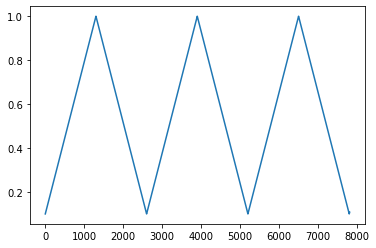

In [5]:
lr_min = 0.1
lr_max = 1.0

n_epochs = 20
batch_size = 128
n_samples = 50000

step_size = 1300

max_iterations = np.floor((n_samples / batch_size) * n_epochs)

iterations = np.arange(0, max_iterations)
cycle = np.floor(1 + (iterations / (2 * step_size)))
x = np.abs((iterations / step_size) - (2 * cycle) + 1)
lr_t = lr_min + (lr_max - lr_min) * (1 - x)

plt.plot(iterations, lr_t)

In [1]:
from eva.Session11.api import Experiment
from eva.Session11.data_manager.data_manager_albumentations import  DataManager
from eva.Session11.utils import textual_summary_cifar10, graphical_summary_cifar10
from eva.Session11.settings import cifar10_classes
from eva.Session11.models.model_s11 import Net
from eva.Session11.grad_cam.grad_cam import GradCam

ModuleNotFoundError: No module named 'eva'

### Create an instance of experiment class

In [35]:
experiment = Experiment(name='default', dataset_name='cifar10')

CUDA status: True
Files already downloaded and verified
Files already downloaded and verified


In [10]:
textual_summary_cifar10(experiment.model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

# LR range test

In [0]:
momentum = 0.9
weight_decay = 0.01
max_lr = 0.25

In [64]:
experiment = Experiment(name='default', dataset_name='cifar10')
experiment.run(epochs=10, momentum=0.9, lr=max_lr, regularization=None, weight_decay=weight_decay, max_lr=max_lr, epochs_up=10, base_momentum=0.85, div_factor=1e6)

CUDA status: True
Files already downloaded and verified
Files already downloaded and verified


TRAIN : epoch=0 train_loss=0.03196 correct/total=19361/50000 lr=0.03 accuracy=38.72: 100%|██████████| 782/782 [00:22<00:00, 34.42it/s]
TEST :  epoch=0 test_loss=2.26861 correct/total=4098/10000 accuracy=40.98: 100%|██████████| 157/157 [00:02<00:00, 75.48it/s]
TRAIN : epoch=1 train_loss=0.02138 correct/total=29932/50000 lr=0.05 accuracy=59.86: 100%|██████████| 782/782 [00:22<00:00, 34.94it/s]
TEST :  epoch=1 test_loss=0.93995 correct/total=6946/10000 accuracy=69.46: 100%|██████████| 157/157 [00:02<00:00, 75.80it/s]
TRAIN : epoch=2 train_loss=0.01276 correct/total=36054/50000 lr=0.08 accuracy=72.11: 100%|██████████| 782/782 [00:22<00:00, 34.66it/s]
TEST :  epoch=2 test_loss=0.69255 correct/total=7729/10000 accuracy=77.29: 100%|██████████| 157/157 [00:02<00:00, 73.09it/s]
TRAIN : epoch=3 train_loss=0.01069 correct/total=38228/50000 lr=0.10 accuracy=76.46: 100%|██████████| 782/782 [00:22<00:00, 34.62it/s]
TEST :  epoch=3 test_loss=0.65647 correct/total=7820/10000 accuracy=78.20: 100%|█████

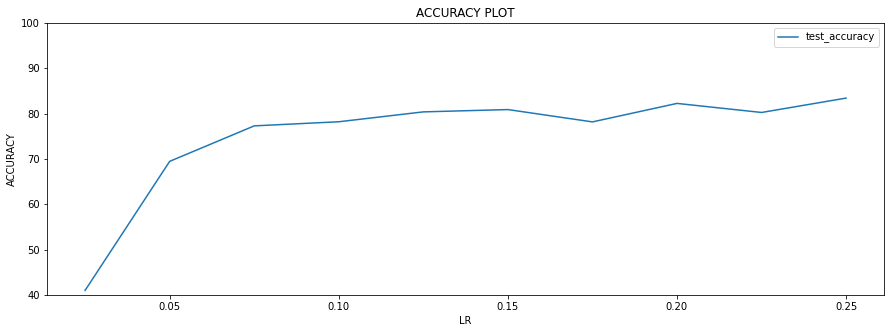

In [65]:
experiment.load_summary()
experiment.plot_lr_range_test_ocp()

Selected max_lr is 0.125 as accuracy stagnates between 0.13 and 0.15

# Training

In [0]:
momentum = 0.9
weight_decay = 0.01
max_lr = 0.125

In [54]:
experiment_ocp = Experiment(name='default', dataset_name='cifar10')

CUDA status: True
Files already downloaded and verified
Files already downloaded and verified


In [55]:
experiment_ocp.run(epochs=24, momentum=0.9, lr=max_lr, regularization=None, weight_decay=weight_decay, max_lr=max_lr, epochs_up=5, base_momentum=0.85, div_factor=10)

TRAIN : epoch=0 train_loss=0.04367 correct/total=13627/50000 lr=0.04 accuracy=27.25: 100%|██████████| 782/782 [00:22<00:00, 35.47it/s]
TEST :  epoch=0 test_loss=1.62996 correct/total=4348/10000 accuracy=43.48: 100%|██████████| 157/157 [00:02<00:00, 76.21it/s]
TRAIN : epoch=1 train_loss=0.02024 correct/total=27465/50000 lr=0.06 accuracy=54.93: 100%|██████████| 782/782 [00:22<00:00, 35.32it/s]
TEST :  epoch=1 test_loss=1.01712 correct/total=6621/10000 accuracy=66.21: 100%|██████████| 157/157 [00:02<00:00, 77.01it/s]
TRAIN : epoch=2 train_loss=0.01409 correct/total=34392/50000 lr=0.08 accuracy=68.78: 100%|██████████| 782/782 [00:22<00:00, 35.21it/s]
TEST :  epoch=2 test_loss=0.86095 correct/total=7094/10000 accuracy=70.94: 100%|██████████| 157/157 [00:02<00:00, 74.49it/s]
TRAIN : epoch=3 train_loss=0.01161 correct/total=37220/50000 lr=0.10 accuracy=74.44: 100%|██████████| 782/782 [00:22<00:00, 35.02it/s]
TEST :  epoch=3 test_loss=0.63230 correct/total=7911/10000 accuracy=79.11: 100%|█████

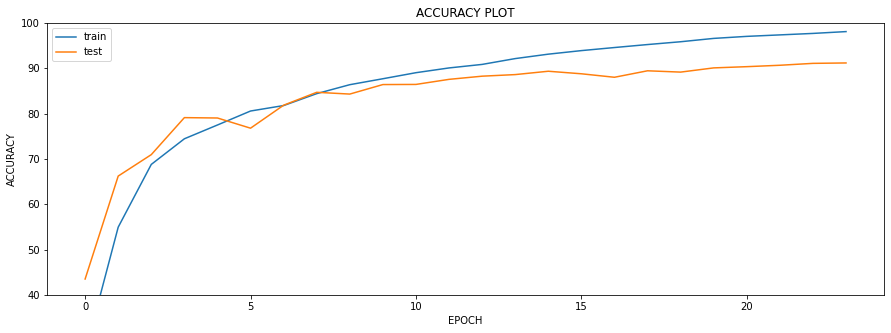

In [59]:
experiment_ocp.load_summary()
experiment_ocp.plot_metric()